# Machine Learning Algorithm
Mount Google Drive, import tensorflow

In [ ]:
# Run once
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
import os

# Setup Directories

In [ ]:
# Base dir
base_dir = '/content/gdrive/MyDrive/Radha01/' # changed from images 04

# Directory with training LLD pictures
train_LLD_dir = base_dir + 'train/LLD/'

# Directory with training No_LLD pictures
train_no_LLD_dir = base_dir + 'train/no_LLD/'

# Directory with Validation LLD pictures
validation_LLD_dir = base_dir + 'validation/LLD/'

# Directory with Validation no-LLD pictures
validation_no_LLD_dir = base_dir + 'validation/no_LLD/'

In [ ]:
train_LLD_fnames = os.listdir( train_LLD_dir )
train_no_LLD_fnames = os.listdir( train_no_LLD_dir )
print(train_LLD_fnames[:20])
print(train_no_LLD_fnames[:20])

['lld_h200_w100_27 (1).png', 'lld_h200_w100_22 (1).png', 'lld_h200_w100_30 (1).png', 'lld_h200_w100_28 (1).png', 'lld_h200_w100_29 (1).png', 'lld_h200_w100_25.png', 'lld_h200_w100_32 (1).png', 'lld_h200_w100_21 (1).png', 'lld_h200_w100_37 (1).png', 'lld_h200_w100_42 (1).png', 'lld_h200_w100_36 (1).png', 'lld_h200_w100_38.png', 'lld_h200_w100_45.png', 'lld_h200_w100_44.png', 'lld_h200_w100_34 (1).png', 'lld_h200_w100_46 (1).png', 'lld_h200_w100_40 (1).png', 'lld_h200_w100_41.png', 'lld_h200_w100_43 (1).png', 'lld_h200_w100_39 (1).png']
['no_lld_h200_w100_42 (1).png', 'no_lld_h200_w100_33 (1).png', 'no_lld_h200_w100_45.png', 'no_lld_h200_w100_35 (1).png', 'no_lld_h200_w100_40 (1).png', 'no_lld_h200_w100_43 (1).png', 'no_lld_h200_w100_44 (1).png', 'no_lld_h200_w100_31.png', 'no_lld_h200_w100_49.png', 'no_lld_h200_w100_50 (1).png', 'no_lld_h200_w100_53.png', 'no_lld_h200_w100_60.png', 'no_lld_h200_w100_47.png', 'no_lld_h200_w100_52.png', 'no_lld_h200_w100_56.png', 'no_lld_h200_w100_51 (1).

In [ ]:
print('total training LLD images :', len(os.listdir(train_LLD_dir)))
print('total training no_LLD images :', len(os.listdir(train_no_LLD_dir)))
print('total validation LLD images :', len(os.listdir(validation_LLD_dir)))
print('total validation no_LLD images :', len(os.listdir(validation_no_LLD_dir)))

total training LLD images : 235
total training no_LLD images : 253
total validation LLD images : 33
total validation no_LLD images : 32


# Visualize images

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 6
ncols = 6

pic_index = 0 # Index for iterating over images

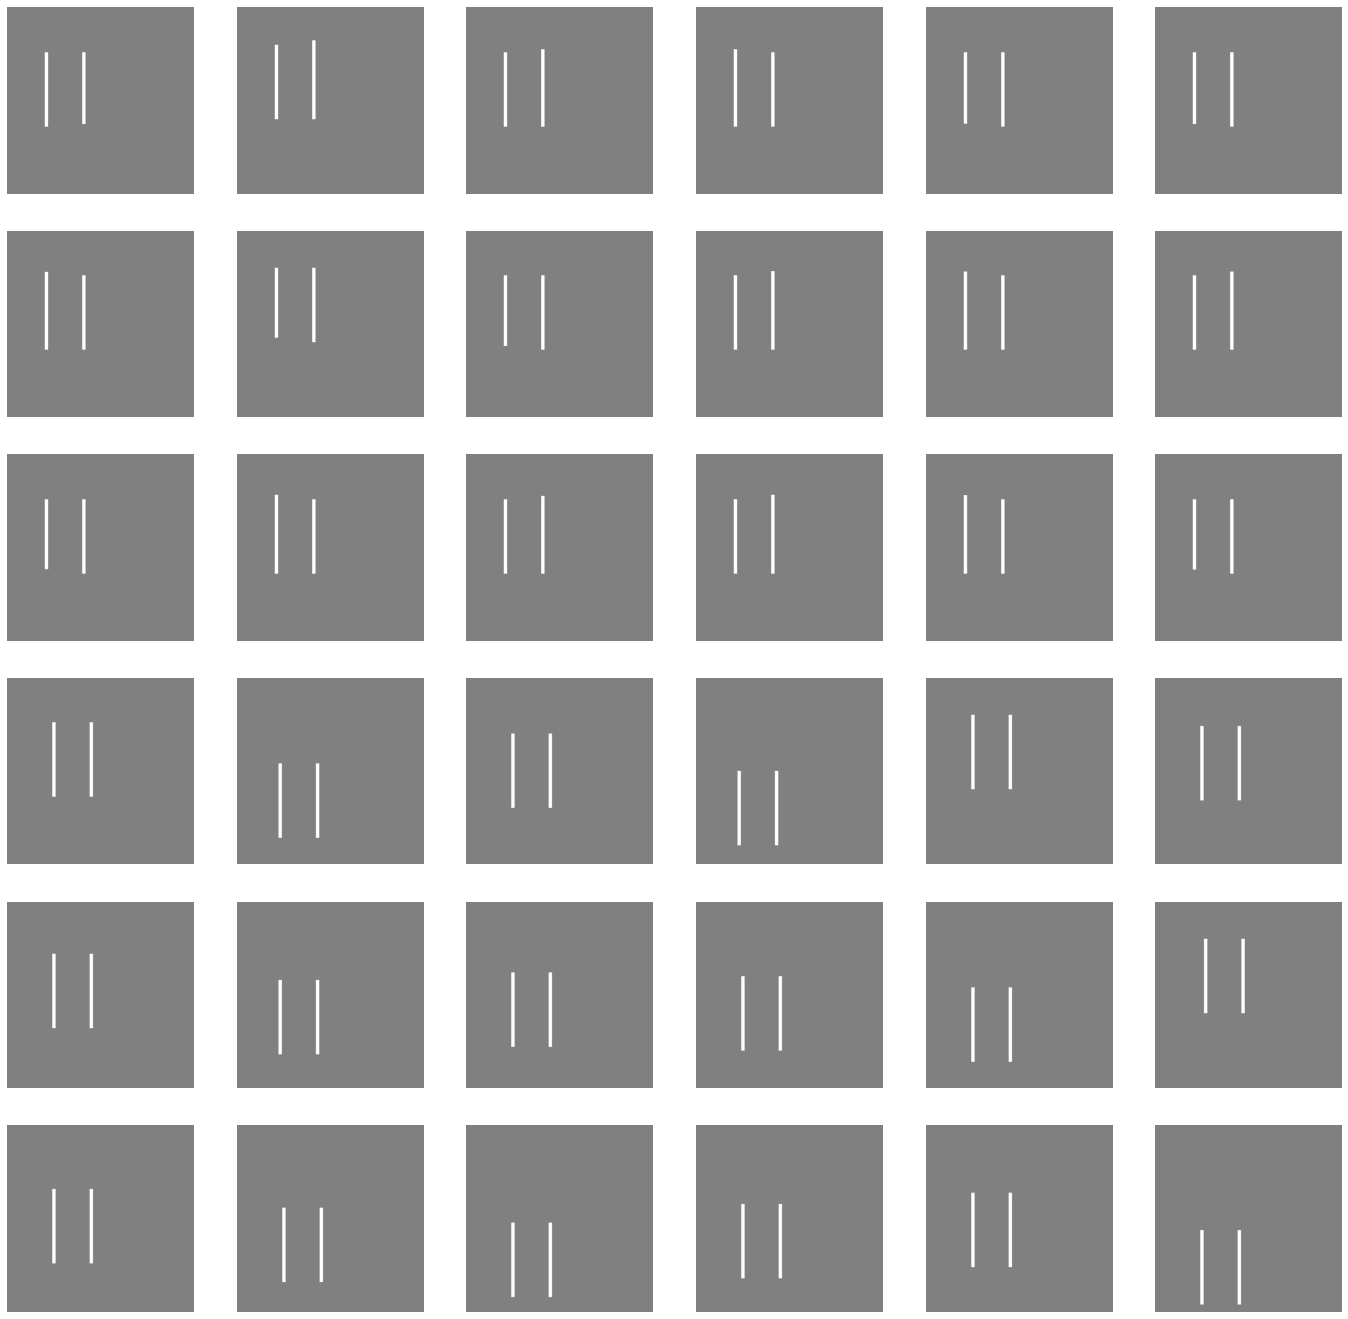

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=18

next_LLD_pix = [os.path.join(train_LLD_dir, fname) 
                for fname in train_LLD_fnames[ pic_index-18:pic_index] 
               ]

next_no_LLD_pix = [os.path.join(train_no_LLD_dir, fname) 
                for fname in train_no_LLD_fnames[ pic_index-18:pic_index]
               ]

for i, img_path in enumerate(next_LLD_pix+next_no_LLD_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


# Setup Model

In [ ]:
X_SIZE = 300
Y_SIZE = 300
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image X_SIZE x Y_SIZE with 3 bytes color
    # This is the first convolution
   tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(X_SIZE, Y_SIZE, 3)),
   tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
   tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
   tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
   tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
   tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),
   # Flatten the results to feed into a DNN
   tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
   tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class (LLD) and 1 for the other ('no_LLD')
   tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 128)       7

In [ ]:
from tensorflow.keras.optimizers import RMSprop
#from tensorflow.keras.optimizers import SGD
# original below this line
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-3),  # ,rho=0.9, epsilon=1e-08, decay=0.0),
               metrics=['accuracy'])
 #              metrics=['binary_accuracy'])

# ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale= None,    #1/255,
      #rotation_range=20,
      #width_shift_range=0.2,
      #height_shift_range=0.2,
      #shear_range=0.1,
      #zoom_range=0.2,
     horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=None)   #1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        base_dir + 'train/',  # This is the source directory for training images
        target_size=(X_SIZE, Y_SIZE),  # All images will be resized to X_SIZE x Y_SIZE
        batch_size=45,  # changed from 5
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        base_dir + 'validation/',  # This is the source directory for training images
        target_size=(X_SIZE, Y_SIZE),  # All images will be resized to X_SIZE x Y_SIZE
        batch_size=6,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 488 images belonging to 2 classes.
Found 65 images belonging to 2 classes.


# Model FIT

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=10,   # 360 images = batch_size (10) * steps
      epochs=10,
      verbose=1,
      validation_data = validation_generator, # 360 images = batch_size (10) * steps 
      validation_steps=10
      )

Epoch 1/10
10/10 [==============================] - 101s 10s/step - loss: 401.4160 - accuracy: 0.5269 - val_loss: 2.2023 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 44s 4s/step - loss: 1.3374 - accuracy: 0.6002 - val_loss: 0.3340 - val_accuracy: 0.9167
Epoch 3/10
10/10 [==============================] - 43s 4s/step - loss: 0.3263 - accuracy: 0.8806 - val_loss: 0.3005 - val_accuracy: 0.9333
Epoch 4/10
10/10 [==============================] - 44s 4s/step - loss: 0.2851 - accuracy: 0.9128 - val_loss: 0.2978 - val_accuracy: 0.9167
Epoch 5/10
10/10 [==============================] - 42s 4s/step - loss: 0.2040 - accuracy: 0.9340 - val_loss: 14.1934 - val_accuracy: 0.4833
Epoch 6/10
10/10 [==============================] - 43s 4s/step - loss: 6.6420 - accuracy: 0.5271 - val_loss: 0.4148 - val_accuracy: 0.8500
Epoch 7/10
10/10 [==============================] - 43s 4s/step - loss: 0.3428 - accuracy: 0.8930 - val_loss: 0.2488 - val_accuracy: 0.9167
Epoch 8/10
10/1

# Model plot

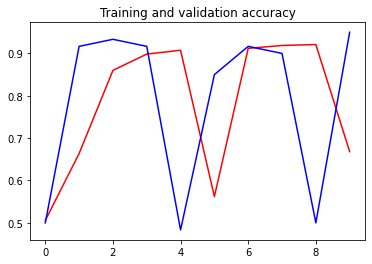

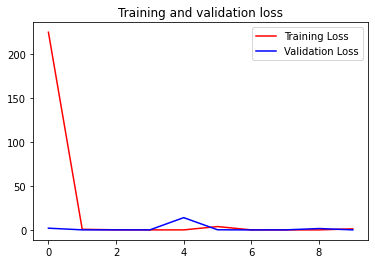

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy'] # changed from accuracy
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Predict on test images

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

test_dir = base_dir + 'real/'
test_files = os.listdir(test_dir)

for fn in test_files:
 
  # predicting images  
  path = test_dir + fn
  img=image.load_img(path, target_size=(X_SIZE, Y_SIZE))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " No LLD")
    
  else:
    print(fn + " Likely LLD")
 

[0.9735955]
human legs.jpg No LLD
[0.99979025]
adultlegs_no_lld.png No LLD


# Running the Model on a set of uploaded files
Choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is a LLD or a no LLD.

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " No LLD")
    
  else:
    print(fn + " Likely LLD")

# Visualizing Intermediate Representations


In [ ]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a LLD or no_LLD from the training set.
LLD_img_files = [os.path.join(train_LLD_dir, f) for f in train_LLD_fnames]
no_LLD_img_files = [os.path.join(train_no_LLD_dir, f) for f in train_no_LLD_fnames]

img_path = random.choice(LLD_img_files + no_LLD_img_files)
img = load_img(img_path, target_size=(X_SIZE, Y_SIZE))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (X_SIZE, Y_SIZE, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, X_SIZE, Y_SIZE, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 